In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import logging
from tqdm.notebook import tqdm
import powerlaw

from graph_summary_utils import *
from cabam_utils import *

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

#logging.basicConfig(level=logging.DEBUG)

## Constant, low assortativity (|C| = 2)

INFO:__main__:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:__main__:Empir. edge prob to deg k: [0.844 0.727 0.633 0.538 0.462 0.399 0.363 0.367 0.274 0.308]
INFO:__main__:Snapshot: (329/4910)=0.067	 Overall: 0.067
INFO:__main__:Max node degree: 117
INFO:__main__:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:__main__:Empir. edge prob to deg k: [0.849 0.714 0.6   0.538 0.461 0.395 0.368 0.328 0.29  0.306]
INFO:__main__:Snapshot: (258/5000)=0.052	 Overall: 0.059
INFO:__main__:Max node degree: 171
INFO:__main__:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:__main__:Empir. edge prob to deg k: [0.836 0.71  0.607 0.529 0.455 0.4   0.382 0.331 0.285 0.276]
INFO:__main__:Snapshot: (243/5000)=0.049	 Overall: 0.056
INFO:__main__:Max node degree: 211
INFO:__main__:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INF


(3.015522935289026, 27.0)


Calculating best minimal value for power law fit
/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Theoretical intra-class ratio: 0.05


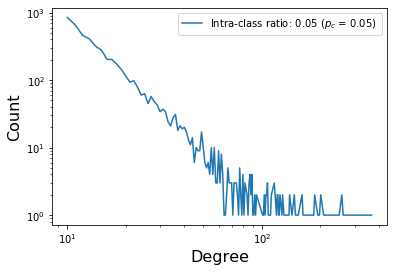

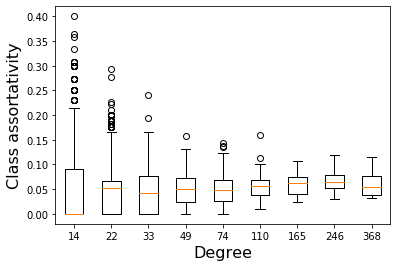

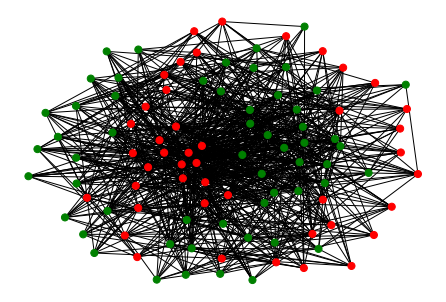

In [2]:
native_probs = [0.5, 0.5]  # using balanced class probs
n = 5000  # grow graph to size of 5000 nodes
m = 10  # each node added connects to m other nodes
c = 2  # there are c classes

# constant setting for fixed assortativity constant p_c throughout the graph
p_c = 0.05 # probability for two nodes of the same class to connect
constant_c_probs = {1: p_c, 0: 1 - p_c}

G, node_degrees, node_labels, intra_class, inter_class, ratio_tracker, alpha_tracker = cabam_graph_generation(n=n, 
                                                                                                              m=m, 
                                                                                                              c=c, 
                                                                                                              native_probs=native_probs,
                                                                                                              c_probs=constant_c_probs,
                                                                                                              logger=logger)

# plot the degree distribution and count of intra/inter-class edges
print(test_degree_distribution([d for n, d in nx.degree(G)]))
ctr = Counter([d for n, d in nx.degree(G)])
degs = sorted(ctr.items())
plt.loglog([deg for (deg, ct) in degs], 
           [ct for (deg, ct) in degs], 
           label=r'Intra-class ratio: {:.2f} ($p_c$ = {:.2f}) '.format(intra_class / (inter_class + intra_class), p_c))
print('Theoretical intra-class ratio:', theoretical_intra_class_estimates(constant_c_probs, native_probs, m))
plt.xlabel('Degree', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
plt.show()

# plot label homophily varying over degrees
plot_degree_label_assortativity(G, node_labels)


# plot a small snapshot of the graph generation itself (for efficiency reasons)
G_s, _, node_labels_s, _, _, _, _ = cabam_graph_generation(n=100,
                                                           m=m, 
                                                           c=c,
                                                           native_probs=native_probs,
                                                           c_probs=constant_c_probs)
plt.figure()
draw_network_with_labels(G_s, node_labels_s)

## Constant, high assortativity (|C| = 2)

INFO:__main__:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:__main__:Empir. edge prob to deg k: [0.898 0.665 0.541 0.547 0.521 0.395 0.397 0.353 0.298 0.305]
INFO:__main__:Snapshot: (4587/4910)=0.934	 Overall: 0.934
INFO:__main__:Max node degree: 97
INFO:__main__:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:__main__:Empir. edge prob to deg k: [0.86  0.681 0.576 0.532 0.487 0.391 0.374 0.358 0.323 0.281]
INFO:__main__:Snapshot: (4762/5000)=0.952	 Overall: 0.943
INFO:__main__:Max node degree: 131
INFO:__main__:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:__main__:Empir. edge prob to deg k: [0.855 0.673 0.573 0.548 0.475 0.386 0.368 0.343 0.322 0.292]
INFO:__main__:Snapshot: (4726/5000)=0.945	 Overall: 0.944
INFO:__main__:Max node degree: 165
INFO:__main__:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
I


(3.046528222666207, 22.0)


Calculating best minimal value for power law fit
/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Theoretical intra-class ratio: 0.95


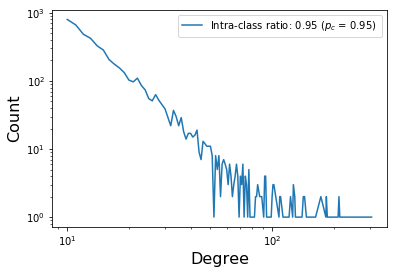

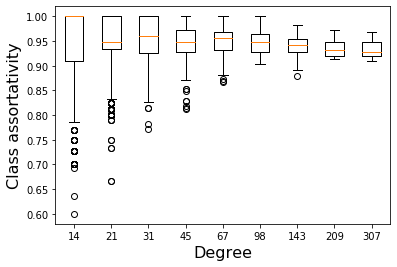

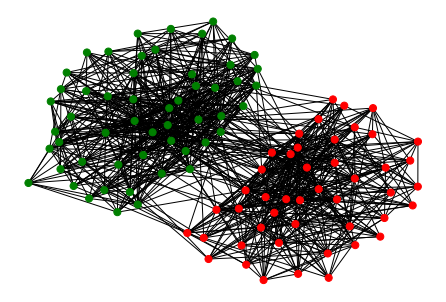

In [3]:
native_probs = [0.5, 0.5]  # using balanced class probs
n = 5000  # grow graph to size of 5000 nodes
m = 10  # each node added connects to m other nodes
c = 2  # there are c classes

# constant setting for fixed assortativity constant p_c throughout the graph
p_c = 0.95 # probability for two nodes of the same class to connect
constant_c_probs = {1: p_c, 0: 1 - p_c}

G, node_degrees, node_labels, intra_class, inter_class, ratio_tracker, alpha_tracker = cabam_graph_generation(n=n, 
                                                                                                              m=m, 
                                                                                                              c=c, 
                                                                                                              native_probs=native_probs,
                                                                                                              c_probs=constant_c_probs,
                                                                                                              logger=logger)

# plot the degree distribution and count of intra/inter-class edges
print(test_degree_distribution([d for n, d in nx.degree(G)]))
ctr = Counter([d for n, d in nx.degree(G)])
degs = sorted(ctr.items())
plt.loglog([deg for (deg, ct) in degs], 
           [ct for (deg, ct) in degs], 
           label=r'Intra-class ratio: {:.2f} ($p_c$ = {:.2f}) '.format(intra_class / (inter_class + intra_class), p_c))
print('Theoretical intra-class ratio:', theoretical_intra_class_estimates(constant_c_probs, native_probs, m))
plt.xlabel('Degree', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
plt.show()

# plot label homophily varying over degrees
plot_degree_label_assortativity(G, node_labels)


# plot a small snapshot of the graph generation itself (for efficiency reasons)
G_s, _, node_labels_s, _, _, _, _ = cabam_graph_generation(n=100,
                                                           m=m, 
                                                           c=c,
                                                           native_probs=native_probs,
                                                           c_probs=constant_c_probs)
plt.figure()
draw_network_with_labels(G_s, node_labels_s)

## Degree-varying, high assortativity (|C| = 2)

INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.836 0.73  0.584 0.519 0.457 0.451 0.37  0.327 0.33  0.3  ]
INFO:root:Snapshot: (4031/4910)=0.821	 Overall: 0.821
INFO:root:Max node degree: 92
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.816 0.757 0.578 0.525 0.435 0.43  0.347 0.302 0.31  0.272]
INFO:root:Snapshot: (4183/5000)=0.837	 Overall: 0.829
INFO:root:Max node degree: 131
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.819 0.744 0.584 0.522 0.439 0.406 0.355 0.31  0.318 0.27 ]
INFO:root:Snapshot: (4211/5000)=0.842	 Overall: 0.833
INFO:root:Max node degree: 172
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.823 0.733 0.5


(3.0003011150344348, 19.0)


Calculating best minimal value for power law fit
/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Theoretical intra-class ratio: 0.8418477845336887


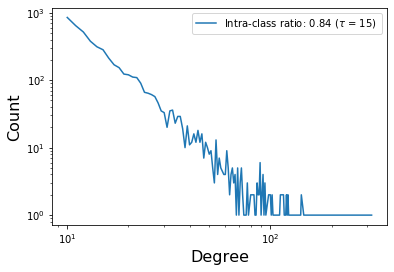

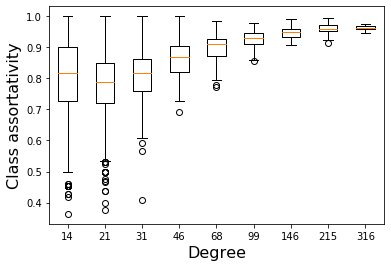

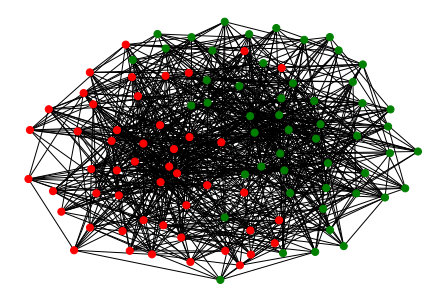

In [4]:
native_probs = [1/2, 1/2]  # using balanced class probs
n = 5000  # grow graph to size of 5000 nodes
m = 10  # each node added connects to m other nodes
c = 2  # there are c classes

# tanh setting for degree-varying assortativity
tau = 15
tanh_c_probs = {k: {1: np.tanh(k/tau), 0: 1 - np.tanh(k/tau)} for k in range(100000)}

G, node_degrees, node_labels, intra_class, inter_class, ratio_tracker, alpha_tracker = cabam_graph_generation(n=n, 
                                                                                                              m=m, 
                                                                                                              c=c,
                                                                                                              native_probs=native_probs,
                                                                                                              c_probs=tanh_c_probs)

# plot the degree distribution and count of intra/inter-class edges
print(test_degree_distribution([d for n, d in nx.degree(G)]))
ctr = Counter([d for n, d in nx.degree(G)])
degs = sorted(ctr.items())
plt.loglog([deg for (deg, ct) in degs], 
           [ct for (deg, ct) in degs], 
           label=r'Intra-class ratio: {:.2f} ($\tau$ = {}) '.format(intra_class / (inter_class + intra_class), tau))
print('Theoretical intra-class ratio:', theoretical_intra_class_estimates(tanh_c_probs, native_probs, m))
plt.xlabel('Degree', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
plt.show()

# plot label homophily varying over degrees
plot_degree_label_assortativity(G, node_labels)

# plot a small snapshot of the graph generation itself (for efficiency reasons)
G_s, _, node_labels_s, _, _, _, _ = cabam_graph_generation(n=100,
                                                           m=m, 
                                                           c=c,
                                                           native_probs=native_probs,
                                                           c_probs=tanh_c_probs)
plt.figure()
draw_network_with_labels(G_s, node_labels_s)

## Degree-varying, low assortativity (|C| = 2)

INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.793 0.731 0.57  0.526 0.5   0.425 0.371 0.343 0.329 0.318]
INFO:root:Snapshot: (913/4910)=0.186	 Overall: 0.186
INFO:root:Max node degree: 111
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.826 0.686 0.557 0.508 0.484 0.457 0.382 0.341 0.309 0.302]
INFO:root:Snapshot: (763/5000)=0.153	 Overall: 0.169
INFO:root:Max node degree: 147
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.83  0.7   0.569 0.497 0.457 0.44  0.377 0.344 0.298 0.293]
INFO:root:Snapshot: (790/5000)=0.158	 Overall: 0.165
INFO:root:Max node degree: 175
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.832 0.707 0.577


(3.033356407457841, 19.0)


Calculating best minimal value for power law fit
/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Theoretical intra-class ratio: 0.15815221546631128


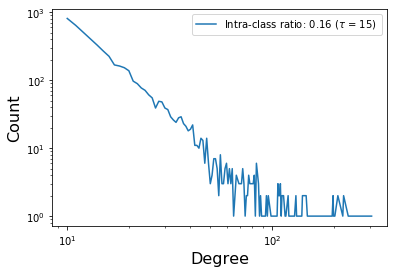

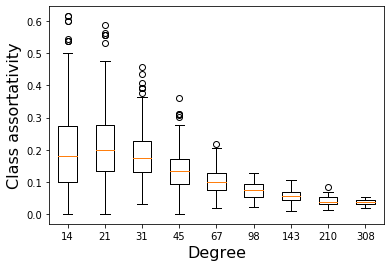

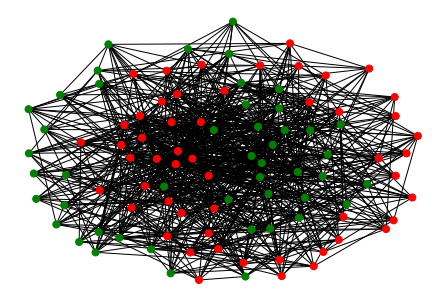

In [5]:
native_probs = [1/2, 1/2]  # using balanced class probs
n = 5000  # grow graph to size of 5000 nodes
m = 10  # each node added connects to m other nodes
c = 2  # there are c classes

# tanh setting for degree-varying assortativity
tau = 15
tanh_c_probs = {k: {1: 1 - np.tanh(k/tau), 0: np.tanh(k/tau)} for k in range(100000)}

G, node_degrees, node_labels, intra_class, inter_class, ratio_tracker, alpha_tracker = cabam_graph_generation(n=n, 
                                                                                                              m=m, 
                                                                                                              c=c,
                                                                                                              native_probs=native_probs,
                                                                                                              c_probs=tanh_c_probs)

# plot the degree distribution and count of intra/inter-class edges
print(test_degree_distribution([d for n, d in nx.degree(G)]))
ctr = Counter([d for n, d in nx.degree(G)])
degs = sorted(ctr.items())
plt.loglog([deg for (deg, ct) in degs], 
           [ct for (deg, ct) in degs], 
           label=r'Intra-class ratio: {:.2f} ($\tau$ = {}) '.format(intra_class / (inter_class + intra_class), tau))
print('Theoretical intra-class ratio:', theoretical_intra_class_estimates(tanh_c_probs, native_probs, m))
plt.xlabel('Degree', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
plt.show()

# plot label homophily varying over degrees
plot_degree_label_assortativity(G, node_labels)

# plot a small snapshot of the graph generation itself (for efficiency reasons)
G_s, _, node_labels_s, _, _, _, _ = cabam_graph_generation(n=100,
                                                           m=m, 
                                                           c=c,
                                                           native_probs=native_probs,
                                                           c_probs=tanh_c_probs)
plt.figure()
draw_network_with_labels(G_s, node_labels_s)

## Degree-varying, high assortativity (|C| = 3)

INFO:root:Theor. edge prob to deg k: [0.909 0.83  0.761 0.7   0.646 0.598 0.556 0.517 0.483 0.452]
INFO:root:Empir. edge prob to deg k: [0.9   0.842 0.788 0.752 0.724 0.655 0.641 0.578 0.553 0.56 ]
INFO:root:Snapshot: (8630/9620)=0.897	 Overall: 0.897
INFO:root:Max node degree: 154
INFO:root:Theor. edge prob to deg k: [0.909 0.83  0.761 0.7   0.646 0.598 0.556 0.517 0.483 0.452]
INFO:root:Empir. edge prob to deg k: [0.907 0.852 0.733 0.734 0.707 0.628 0.622 0.528 0.513 0.518]
INFO:root:Snapshot: (9330/10000)=0.933	 Overall: 0.915
INFO:root:Max node degree: 204
INFO:root:Theor. edge prob to deg k: [0.909 0.83  0.761 0.7   0.646 0.598 0.556 0.517 0.483 0.452]
INFO:root:Empir. edge prob to deg k: [0.879 0.851 0.74  0.738 0.703 0.619 0.606 0.53  0.505 0.502]
INFO:root:Snapshot: (9353/10000)=0.935	 Overall: 0.922
INFO:root:Max node degree: 244
INFO:root:Theor. edge prob to deg k: [0.909 0.83  0.761 0.7   0.646 0.598 0.556 0.517 0.483 0.452]
INFO:root:Empir. edge prob to deg k: [0.88  0.849 


(3.029884057508998, 29.0)


Calculating best minimal value for power law fit
/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Theoretical intra-class ratio: 0.9682008727653802


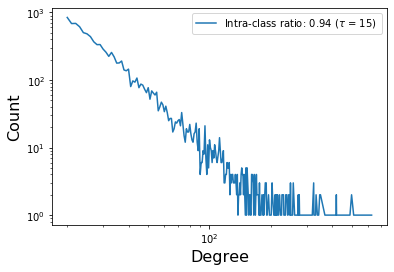

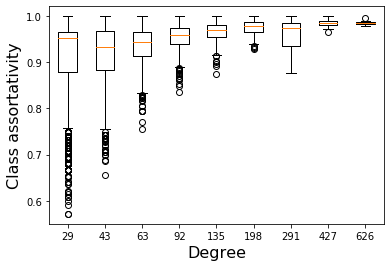

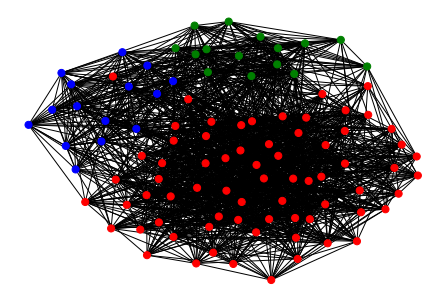

In [6]:
native_probs = [2/3, 1/6, 1/6]  # using suitable multinomial parameters for the 3-class case as discussed on page 5
n = 10000  # grow graph to size of 5000 nodes
m = 20  # each node added connects to m other nodes
c = 3  # there are c classes

# tanh setting for degree-varying assortativity
tau = 15
tanh_c_probs = {k: {1: np.tanh(k/tau), 0: 1 - np.tanh(k/tau)} for k in range(100000)}

G, node_degrees, node_labels, intra_class, inter_class, ratio_tracker, alpha_tracker = cabam_graph_generation(n=n, 
                                                                                                              m=m, 
                                                                                                              c=c,
                                                                                                              native_probs=native_probs,
                                                                                                              c_probs=tanh_c_probs)

# plot the degree distribution and count of intra/inter-class edges
print(test_degree_distribution([d for n, d in nx.degree(G)]))
ctr = Counter([d for n, d in nx.degree(G)])
degs = sorted(ctr.items())
plt.loglog([deg for (deg, ct) in degs], 
           [ct for (deg, ct) in degs], 
           label=r'Intra-class ratio: {:.2f} ($\tau$ = {}) '.format(intra_class / (inter_class + intra_class), tau))
print('Theoretical intra-class ratio:', theoretical_intra_class_estimates(tanh_c_probs, native_probs, m))
plt.xlabel('Degree', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
plt.show()

# plot label homophily varying over degrees
plot_degree_label_assortativity(G, node_labels)

# plot a small snapshot of the graph generation itself (for efficiency reasons)
G_s, _, node_labels_s, _, _, _, _ = cabam_graph_generation(n=100,
                                                           m=m, 
                                                           c=c,
                                                           native_probs=native_probs,
                                                           c_probs=tanh_c_probs)
plt.figure()
draw_network_with_labels(G_s, node_labels_s)

## Simulating class-conditional features for a given graph

In [7]:
# Although CABAM incorporates class-conditional feature assignment as part of the generative process, it is possible
# to generate node features after graph generation and class assignment is complete, since the features themselves do
# not influence graph formation independent of their class.

n_nodes_in_G = len(G)
n_classes_in_G = len(np.unique(node_labels))
print('Number of nodes in G:', n_nodes_in_G)
print('Class identifiers in G:', n_classes_in_G)

# Example class-conditional feature generation
feature_means = np.eye(n_classes_in_G)
node_features = []
for n_id, c_id in zip(range(len(G)), node_labels):
    f = np.random.multivariate_normal(mean=feature_means[c_id, :],
                                      cov=feature_means,
                                      size=1)
    node_features.append(f.ravel())

node_features = np.array(node_features)

print('Generated feature matrix of shape:', node_features.shape)

Number of nodes in G: 10000
Class identifiers in G: 3
Generated feature matrix of shape: (10000, 3)
